<a href="https://colab.research.google.com/github/javiervasquezufm/Data-science-/blob/master/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Proyecto Final

#GPU

In [0]:
import xgboost as xgb

In [3]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

#Librerias

In [0]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns

import statsmodels
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import NearestNeighbors , KNeighborsClassifier
from sklearn import linear_model

#Datos

In [0]:
from google.colab import files

In [0]:
salaries = files.upload()

Saving Salaries.csv to Salaries (1).csv


In [0]:
batting = files.upload()

Saving Batting.csv to Batting (1).csv


In [0]:
bateo = pd.read_csv("Batting (1).csv")

In [0]:
salario = pd.read_csv("Salaries (1).csv")

#Tratamiento de Datos

In [8]:
data=pd.merge(bateo, salario, on='playerID')
data.head()

,playerID,yearID_x,stint,teamID_x,lgID_x,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,yearID_y,teamID_y,lgID_y,salary
0,lawrebr01,1954,1,SLN,NL,35,53,2,10,0,0,0,4.0,0.0,0.0,3,15.0,NaN,1.0,1.0,0.0,0.0,2007,COL,NL,500000
1,lawrebr01,1955,1,SLN,NL,46,21,1,2,0,0,0,2.0,0.0,0.0,1,0.0,0.0,0.0,2.0,0.0,0.0,2007,COL,NL,500000
2,lawrebr01,1956,1,CIN,NL,49,70,4,11,2,1,0,4.0,0.0,0.0,2,28.0,0.0,1.0,6.0,2.0,2.0,2007,COL,NL,500000
3,lawrebr01,1957,1,CIN,NL,49,82,4,14,2,0,0,7.0,0.0,0.0,6,26.0,0.0,0.0,6.0,0.0,4.0,2007,COL,NL,500000
4,lawrebr01,1958,1,CIN,NL,46,53,1,6,0,0,0,3.0,1.0,1.0,5,13.0,0.0,0.0,1.0,2.0,1.0,2007,COL,NL,500000


In [0]:
data.fillna(0, inplace=True)

In [0]:
data["salary"].median()

850000.0

In [0]:
mayor = data.salary >= 850000
menor = data.salary < 850000
column_name = 'salary01'
data.loc[mayor, column_name] = '1'
data.loc[menor, column_name] = '0'

#Información de datos

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316293 entries, 0 to 316292
Data columns (total 27 columns):
playerID    316293 non-null object
yearID_x    316293 non-null int64
stint       316293 non-null int64
teamID_x    316293 non-null object
lgID_x      316293 non-null object
G           316293 non-null int64
AB          316293 non-null int64
R           316293 non-null int64
H           316293 non-null int64
2B          316293 non-null int64
3B          316293 non-null int64
HR          316293 non-null int64
RBI         316293 non-null float64
SB          316293 non-null float64
CS          316293 non-null float64
BB          316293 non-null int64
SO          316293 non-null float64
IBB         316293 non-null float64
HBP         316293 non-null float64
SH          316293 non-null float64
SF          316293 non-null float64
GIDP        316293 non-null float64
yearID_y    316293 non-null int64
teamID_y    316293 non-null object
lgID_y      316293 non-null object
salary      3162

In [0]:
alldata = list(data.shape)[0]
categories = list(data['salary01'].value_counts())

print("\n \t The data has {} players, {} paid below average and {} paid above average.".format(alldata, 
                                                                                 categories[0], 
                                                                                 categories[1]))


 	 The data has 316293 players, 159124 paid below average and 157169 paid above average.


#Datos Finales

In [0]:
cols = list(data.columns.values)
cols.remove("salary")
cols.remove("playerID")
cols.remove("teamID_x")
cols.remove("lgID_x")
cols.remove("teamID_y")
cols.remove("lgID_y")
cols.remove("yearID_x")
cols.remove("yearID_y")
cols.remove("stint")
cols.remove("SH")
cols.remove("SF")
cols.remove("GIDP")
cols.remove("RBI")
cols.remove("SB")
cols.remove("CS")
cols.remove("BB")
cols.remove("SO")
cols.remove("IBB")
cols.remove("HBP")
data1 = data[cols]

In [12]:
data1.head()

,G,AB,R,H,2B,3B,HR,salary01
0,35,53,2,10,0,0,0,0
1,46,21,1,2,0,0,0,0
2,49,70,4,11,2,1,0,0
3,49,82,4,14,2,0,0,0
4,46,53,1,6,0,0,0,0


In [0]:
features_mean= list(data1.columns[1:7])

#Heatmap

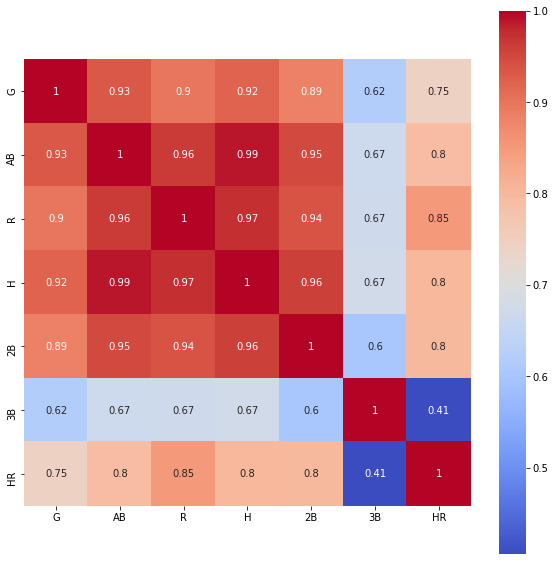

In [0]:
plt.figure(figsize=(10,10))
sns.heatmap(data[features_mean].corr(), annot=True, square=True, cmap='coolwarm')
plt.show()

#Scatter Mix

In [0]:
from pandas.plotting import scatter_matrix

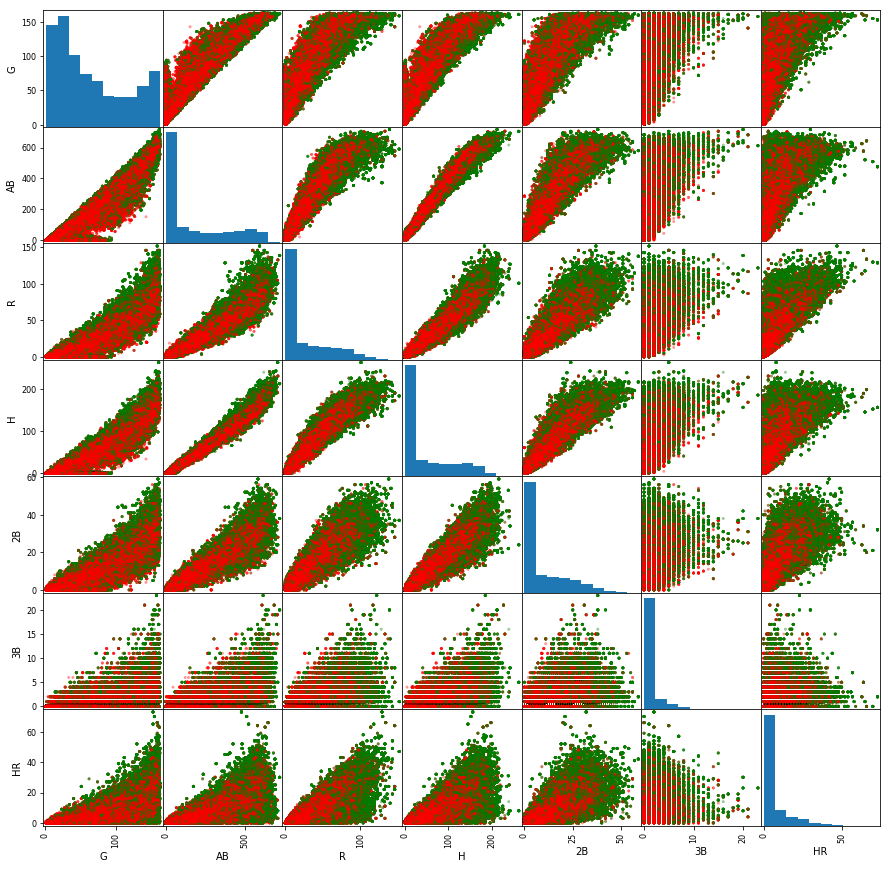

In [0]:
color_dic = {'0':'red', '1':'green'}
colors = data1['salary01'].map(lambda x: color_dic.get(x))

sm = scatter_matrix(data1[features_mean], c=colors, alpha=0.4, figsize=((15,15)));

plt.show()

#Distribución

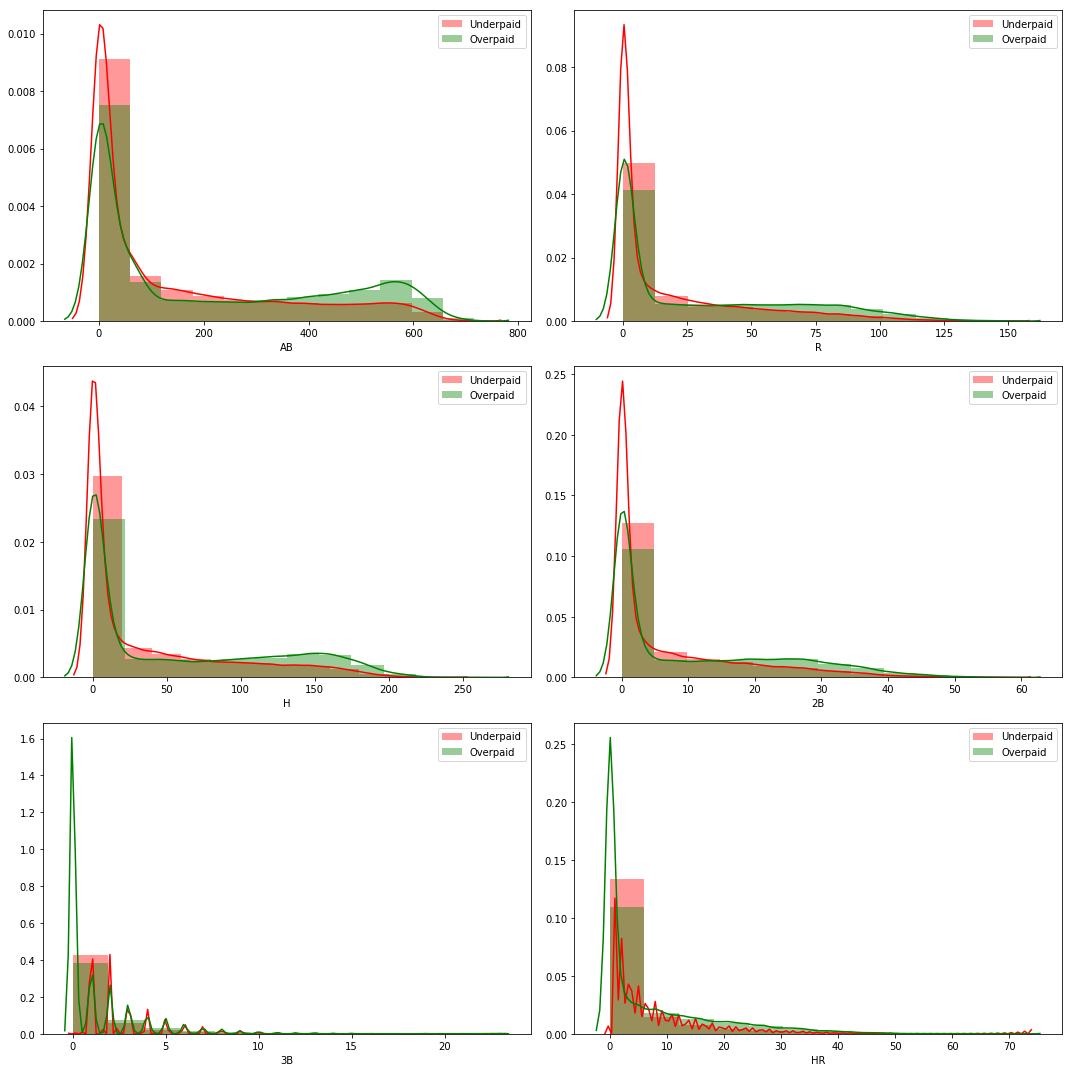

In [0]:
bins = 12
plt.figure(figsize=(15,15))
for i, feature in enumerate(features_mean):
    rows = int(len(features_mean)/2)
    
    plt.subplot(rows, 2, i+1)
    
    sns.distplot(data1[data1['salary01']=='0'][feature], bins=bins, color='red', label='Underpaid');
    sns.distplot(data1[data1['salary01']=='1'][feature], bins=bins, color='green', label='Overpaid');
    
    plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

#Train & Test

In [0]:
features_selection = ['G', 'AB', 'R', 'H', '2B', '3B', 'HR']

In [0]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
import time

In [0]:
X = data.loc[:,features_mean]
y = data.loc[:, 'salary01']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

accuracy_all = []
cvs_all = []

#Support Vector Machines

In [0]:
from sklearn.svm import LinearSVC

start = time.time()

clf = LinearSVC()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("LinearSVC Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC Accuracy: 54.71%
Cross validation score: 51.61% (+/- 3.86%)
Execution time: 206.43 seconds 



#KNN

In [30]:
from sklearn.neighbors import KNeighborsClassifier

start = time.time()

clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

Accuracy: 58.91%
Cross validation score: 48.28% (+/- 5.83%)
Execution time: 42.213 seconds 



#Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

start = time.time()

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("Random Forest Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest Accuracy: 62.81%
Cross validation score: 49.35% (+/- 5.75%)
Execution time: 17.042 seconds 



In [0]:
from sklearn.ensemble import RandomForestRegressor

In [24]:
regr2 = RandomForestRegressor(max_features=4, random_state=42)
regr2.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=4, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=None, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

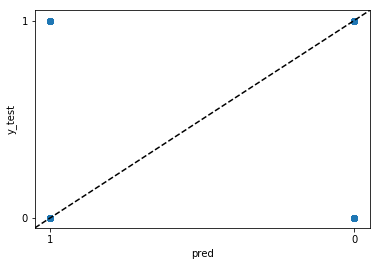

In [28]:
pred = regr2.predict(X_test)

plt.scatter(prediction, y_test, label='medv')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')
plt.show()

#Decision Tree

In [0]:
start = time.time()

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("Dedicion Tree Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

Dedicion Tree Accuracy: 62.64%
Cross validation score: 47.80% (+/- 6.34%)
Execution time: 6.5169 seconds 



#LDA

In [0]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=5)  
X_train = lda.fit_transform(X_train, y_train)  
X_test = lda.transform(X_test)
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)

classifier.fit(X_train, y_train)  
y_pred = classifier.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [0]:
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)  
print(cm)  
print('LDA Accuracy' + str(accuracy_score(y_test, y_pred)))

[[25564  5818]
 [21080 10797]]
LDA Accuracy0.5747956812469371


#QDA

In [0]:
QDA = QuadraticDiscriminantAnalysis()
model2 = QDA.fit(X_train, y_train)

In [0]:
print(model2.priors_)
print(model2.means_)

[0.49711501 0.50288499]
[[-0.1882999 ]
 [ 0.18613939]]


In [0]:
from sklearn.metrics import classification_report
pred2=model2.predict(X_test)
print(np.unique(pred2, return_counts=True))
print(confusion_matrix(pred2, y_test))
print(classification_report(y_test, pred2, digits=3))
print('QDA Accuracy' + str(accuracy_score(y_test, pred2)))

(array(['0', '1'], dtype=object), array([49047, 14212]))
[[26733 22314]
 [ 4649  9563]]
              precision    recall  f1-score   support

           0      0.545     0.852     0.665     31382
           1      0.673     0.300     0.415     31877

   micro avg      0.574     0.574     0.574     63259
   macro avg      0.609     0.576     0.540     63259
weighted avg      0.609     0.574     0.539     63259

QDA Accuracy0.5737681594713796


#Logistic Regresion

In [0]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
print(classification_report(y_test,predictions))
print('Logistic Regresion Accuracy' + str(accuracy_score(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.55      0.75      0.63     31382
           1       0.62      0.40      0.48     31877

   micro avg       0.57      0.57      0.57     63259
   macro avg       0.58      0.57      0.56     63259
weighted avg       0.58      0.57      0.56     63259

Logistic Regresion Accuracy0.5721873567397524


#Best Subset

In [0]:
import itertools
import time
from sklearn.metrics import mean_squared_error
def fit_linear_reg(X,y):
    model_k = linear_model.LinearRegression(fit_intercept = True)
    model_k.fit(X,y)
    RSS = mean_squared_error(y,model_k.predict(X)) * len(y)
    R_squared = model_k.score(X,y)
    return RSS, R_squared

In [0]:
k = 11

RSS_list, R_squared_list, feature_list = [],[], []
numb_features = []

from tqdm import tnrange, tqdm_notebook

for k in tnrange(1,len(X.columns) + 1, desc = 'Loop...'):

    for combo in itertools.combinations(X.columns,k):
        tmp_result = fit_linear_reg(X[list(combo)],y)   
        RSS_list.append(tmp_result[0])                  
        R_squared_list.append(tmp_result[1])
        feature_list.append(combo)
        numb_features.append(len(combo))

In [0]:
df = pd.DataFrame({'numb_features': numb_features,'RSS': RSS_list, 'R_squared':R_squared_list,'features':feature_list})

In [0]:
df

,numb_features,RSS,R_squared,features
0,1,76954.349387,0.026759,"(AB,)"
1,1,76638.042136,0.030760,"(R,)"
2,1,76802.024276,0.028686,"(H,)"
3,1,76827.809035,0.028360,"(2B,)"
4,1,78384.830763,0.008668,"(3B,)"
5,1,76719.345457,0.029732,"(HR,)"
6,2,76606.035139,0.031165,"(AB, R)"
7,2,76733.782918,0.029549,"(AB, H)"
8,2,76816.420635,0.028504,"(AB, 2B)"
9,2,76917.172879,0.027230,"(AB, 3B)"
